# Storage Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for Storage in 2023 is 857.5940 dollars. It is profitable, with total net profit at 304.9489 dollars. This put FinanceHub's profit margin at 35.5 %.
>* Initial revenue growth is highest (60% in February), but with few users coming in and out with purchases, revenue growth fluctuates significantly. Some month there is negative growth as, users completely churned and there is few new user; as in the month of March with 3 new user, 100% user churn, and -24.3% CMGR. Some month, bulk purchases from new users cover for the churn rate, such as in August, with 2 new users, 100% churn rate, and 4.7% CMGR. On average, CMGR is around 2.6%.
>* On average, Storage have around 26 users each month, with 5 being active. There is a 96% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* For most cohort, there no activity beyond the initial purchase (retention rates is 0%, NDR is 0%). Around Q4 (usually in September) there is some returning users for some cohorts.
>* December cohort (6 users) has the highest initial purchase, at 110.10.
>* On a per-customer basis, revenue is stagnant as many cohorts do not make subsequent purchases. August cohort contributes the highest revenue per user (40.94, by December) and have a more upwards-trending cumulative revenue than other cohorts. Profit-wise, August cohort is also the only cohort to have an upwards trending CLV, and marks the highest profit from all the cohorts per user (17.80 by December). 
>* Besides a few negative profit values per user in the June cohort (which is positive by September at 5.15), CLV for Storage is positive.
>
>Profitability
>* Pre-discounts, the overall financial health of Storage looks strong with consistently positive profits, and no months showing negative profits.
>* Certain periods showed particularly high overall profits. Specifically, September had the highest overall profit with 84.2730, followed by December with 73.2729, and November with 62.1939. These months stand out due to their significantly higher profits compared to other months, likely driven by seasonal trends.
>* January to August shows relatively low positive profits, with the highest in August (30.7840) and the lowest in June (2.2014). This indicate lower consumer spending during the first half of the year.
>
>Discounting EDA
>* There were 64 invoices for Storage in 2023, 21 of which were applied discounts (~ 33%). All discounted orders are applied 20% discount. This suggests a strategy to balance profit margins and customer incentives.
>* Discounting has had a minimal overall impact on Storage's profits. September, November, and December maintains highest overall profits even after discounts (68.1082, 60.0291, and 62.6569, respectively).
>* For Storage, 0% discounts yield slightly higher and stable profits, while 20% discounts increase variability and potential losses. A slight reduction in discounts might be possible.
>
>Ideal Customer Profile (ICP) EDA
>* SMB segment leads with the highest shares in Total Accounts (56.25%), Net Revenue (61.94%), Total Quantity (58.63%), and Total Sales (60.72%). It also tops in Net Profit Before Discount (231.38) and Net Profit (206.63). The Strategic segment holds significant shares in Total Accounts (23.44%), Net Revenue (23.02%), Total Quantity (24.90%), and Total Sales (24.53%), with a Net Profit Before Discount of 96.25 and Net Profit of 70.19. The Enterprise segment demonstrates efficient cost management and profitability, with both Net Profit Before Discount and Net Profit at 28.13.
>* In the SMB segment, top-performing industries include Energy in EMEA, and Finance, Retail, Healthcare, and Communications in AMER. These sectors are crucial for customer engagement and product improvement. Prioritizing these industries for marketing investments and discount allocations can effectively drive growth.
>* For the Strategic segment, Energy in APJ, Finance in AMER, and Retail in APJ are top-performing industries. In the Enterprise segment, Tech industries in APJ and Energy industries in EMEA stand out, all being crucial for strategic growth.
>* Each region has high-performing aspects. AMER experienced significant sales and net profit peaks, particularly in September and December. However, performance fluctuated throughout the year, with some months showing lower sales and profits. 
>* EMEA consistently excelled in sales and net profits, especially in the middle and later parts of the year, despite the impact of discounts. The region maintained positive net profits throughout the year except for June, and exhibited significant peaks in May, August, and November.
>* APJ's sales and net profits is consistently lower than EMEA and AMER, with the exception of a notable peak in September. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod14 = df.query("Product == 'Storage'")
# then slice product df by year of analysis
prod14_2023=prod14.query('year == 2023')

----

### General Performance Report

In [8]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod14_2023['reg_date'] = prod14_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_13104\1176428230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod14_2023['reg_date'] = prod14_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [9]:
# make a user df, from the product df
prod14_2023_user = prod14_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [10]:
# from user df, extract month datetime data, from date of first purchase
prod14_2023_user['reg_month']= prod14_2023_user['reg_date'].values.astype('datetime64[M]')

In [11]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod14_2023_user['key'] = 1
prod14_2023_user = template_table.merge(prod14_2023_user,on='key')
prod14_2023_user =prod14_2023_user.drop('key',axis=1)

In [12]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod14_2023_user = prod14_2023_user[prod14_2023_user['Month']>=prod14_2023_user['reg_month']]

In [13]:
prod14_2023['Month'] = prod14_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod14_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod14_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod14_2023_user = prod14_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod14_2023_user = prod14_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_13104\873821502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod14_2023['Month'] = prod14_2023['Order Date'].values.astype('datetime64[M]')


In [14]:
prod14_2023_user['user'] = 1    
prod14_2023_user['new user'] = (prod14_2023_user['reg_month'] == prod14_2023_user['Month']) * 1 
prod14_2023_user['active'] = (prod14_2023_user['Sales'] > 0) * 1   
prod14_2023_user['active_prev'] = (prod14_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod14_2023_user['change_status'] = (prod14_2023_user['active'] != prod14_2023_user['active_prev']) * 1
prod14_2023_user['session_id'] = (prod14_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod14_2023_user['inactive'] = (prod14_2023_user['active'] == 0) * 1
prod14_2023_user['month_inactive'] = (prod14_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [15]:
#Storage monthly user report (2023)
prod14_2023_report = prod14_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod14_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,19.0000,5.0000,43.0400,40.0160,17.3859,14.3619,5,5,5
2023-02-01,22.0000,5.0000,68.8760,59.0248,26.6494,16.7982,10,5,5
2023-03-01,11.0000,3.0000,24.6800,24.6800,4.2346,4.2346,13,3,3
2023-04-01,13.0000,4.0000,27.7900,26.2060,11.0956,9.5116,17,4,4
2023-05-01,13.0000,5.0000,44.0740,42.1092,11.5211,9.5563,21,4,5
2023-06-01,7.0000,3.0000,28.3140,26.0532,2.2014,-0.0594,24,3,3
2023-07-01,9.0000,3.0000,13.7960,13.2168,3.4998,2.9206,26,2,3
2023-08-01,12.0000,2.0000,59.3200,54.4560,30.7840,25.9200,28,2,2
2023-09-01,40.0000,9.0000,167.1040,150.9392,84.2730,68.1082,34,6,9


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [15]:
prod14_2023_churn = prod14_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod14_2023_churn['old active'] = (prod14_2023_churn['active'] - prod14_2023_churn['new user'])
prod14_2023_churn['user churn'] = ((1 - (prod14_2023_churn['old active'] / prod14_2023_churn['user'].shift(1))) * 100).round()
prod14_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,43.0400,14.3619,5,5,5,0,NaN
2023-02-01,68.8760,16.7982,10,5,5,0,100.0000
2023-03-01,24.6800,4.2346,13,3,3,0,100.0000
2023-04-01,27.7900,9.5116,17,4,4,0,100.0000
2023-05-01,44.0740,9.5563,21,4,5,1,94.0000
2023-06-01,28.3140,-0.0594,24,3,3,0,100.0000
2023-07-01,13.7960,2.9206,26,2,3,1,96.0000
2023-08-01,59.3200,25.9200,28,2,2,0,100.0000
2023-09-01,167.1040,68.1082,34,6,9,3,89.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [16]:
#monthly avg. user churn
prod14_2023_churn[["user", "active", "user churn"]].mean()

user         25.5000
active        5.2500
user churn   95.7273
dtype: float64

In [18]:
prod14_2023_churn[["new user"]].mean()

new user   4.0000
dtype: float64

In [20]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report= prod14_2023_churn.reset_index()
sales_report['month'] = sales_report.index + 1

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 43.0400, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month', 'month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report

,Month,Sales,net_profit,user,new user,active,old active,user churn,CMGR
0,2023-01-01,43.0400,14.3619,5,5,5,0,NaN,0.0000
1,2023-02-01,68.8760,16.7982,10,5,5,0,100.0000,60.0279
2,2023-03-01,24.6800,4.2346,13,3,3,0,100.0000,-24.2755
3,2023-04-01,27.7900,9.5116,17,4,4,0,100.0000,-13.5685
4,2023-05-01,44.0740,9.5563,21,4,5,1,94.0000,0.5953
5,2023-06-01,28.3140,-0.0594,24,3,3,0,100.0000,-8.0343
6,2023-07-01,13.7960,2.9206,26,2,3,1,96.0000,-17.2731
7,2023-08-01,59.3200,25.9200,28,2,2,0,100.0000,4.6897
8,2023-09-01,167.1040,68.1082,34,6,9,3,89.0000,18.4784
9,2023-10-01,72.3560,30.9109,38,4,5,1,97.0000,5.9417


In [21]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

1.4192814423393554

In [22]:
#The CMGR is skewed (positive), median is closest I can get to an average
sales_report['CMGR'].median()

2.6425044403388553

In [23]:
prod14_2023[['Sales', 'net_profit']].sum()

Sales        857.5940
net_profit   304.9489
dtype: float64

In [24]:
# Total monthly profit margin
( 304.9489/  857.5940) * 100

35.55865596074599

In [25]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.9787
net_profit,0.9787,1.0000


In [26]:
prod14_2023_report[['new user', 'Quantity']].corr()

,new user,Quantity
new user,1.0000,0.8108
Quantity,0.8108,1.0000


**Key findings:**
1. On average, Storage have around 26 users each month, with 5 being active. There is a 96% likelihood of users churning in the next month. Based on total monthly data, as users are few and don't stick around long, number of accounts and unit purchases fluctuate depending on the number of new users that month. On average, there is 4 new users each monthly period.
2. Initial revenue growth is highest (60% in February), but with few users coming in and out with purchases, revenue growth fluctuates significantly. Some month there is negative growth as, users completely churned and there is few new user; as in the month of March with 3 new user, 100% user churn, and -24.3% CMGR. Some month, bulk purchases from new users cover for the churn rate, such as in August, with 2 new users, 100% churn rate, and 4.7% CMGR. On average, CMGR is around 2.6%.
3. Total revenue for Storage in 2023 is 857.5940 dollars. It is profitable, with total net profit at 304.9489 dollars. This put FinanceHub's profit margin at 35.5 %.
4. Increase in monthly revenue does not equal an increase in monthly profit. Sales of March was lower than in June (27.7900 compared to 28.3140), yet it yielded higher profit (9.5116 compared to -0.0594). Overall, however, based on total monthly data, increase in monthly revenue for Storage seems to equal an increase in monthly profit. Using a correlation test, we can see that there is a strong positive correlation between revenue and profit.

In [28]:
sales_report

,Month,Sales,net_profit,user,new user,active,old active,user churn,CMGR
0,2023-01-01,43.0400,14.3619,5,5,5,0,NaN,0.0000
1,2023-02-01,68.8760,16.7982,10,5,5,0,100.0000,60.0279
2,2023-03-01,24.6800,4.2346,13,3,3,0,100.0000,-24.2755
3,2023-04-01,27.7900,9.5116,17,4,4,0,100.0000,-13.5685
4,2023-05-01,44.0740,9.5563,21,4,5,1,94.0000,0.5953
5,2023-06-01,28.3140,-0.0594,24,3,3,0,100.0000,-8.0343
6,2023-07-01,13.7960,2.9206,26,2,3,1,96.0000,-17.2731
7,2023-08-01,59.3200,25.9200,28,2,2,0,100.0000,4.6897
8,2023-09-01,167.1040,68.1082,34,6,9,3,89.0000,18.4784
9,2023-10-01,72.3560,30.9109,38,4,5,1,97.0000,5.9417


### Monthly Cohort Analysis

In [16]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod14_2023_user['date']=prod14_2023_user['Month'].dt.to_period('M')
prod14_2023_user['cohort']= prod14_2023_user['reg_month'].dt.to_period('M')
prod14_2023_user['lifetime'] = (prod14_2023_user['date'] - prod14_2023_user['cohort']).apply(attrgetter('n'))

In [16]:
prod14_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1029,Anthem,2023-01-25,2023-01-01,3.0000,5.6700,5.6700,0.1134,0.1134,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1056,Phillips 66,2023-01-15,2023-01-01,2.0000,2.5200,2.5200,0.1008,0.1008,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [17]:
prod14_cohort = prod14_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod14_cohort ['active rate'] = (prod14_cohort['active'] / prod14_cohort['user']) * 100
prod14_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,5,5,5,100.0000
1,2023-01-01,1,5,0,0,0.0000
2,2023-01-01,2,5,0,0,0.0000
3,2023-01-01,3,5,0,0,0.0000
4,2023-01-01,4,5,0,0,0.0000
...,...,...,...,...,...,...
73,2023-10-01,1,4,0,1,25.0000
74,2023-10-01,2,4,0,0,0.0000
75,2023-11-01,0,4,4,4,100.0000
76,2023-11-01,1,4,0,1,25.0000


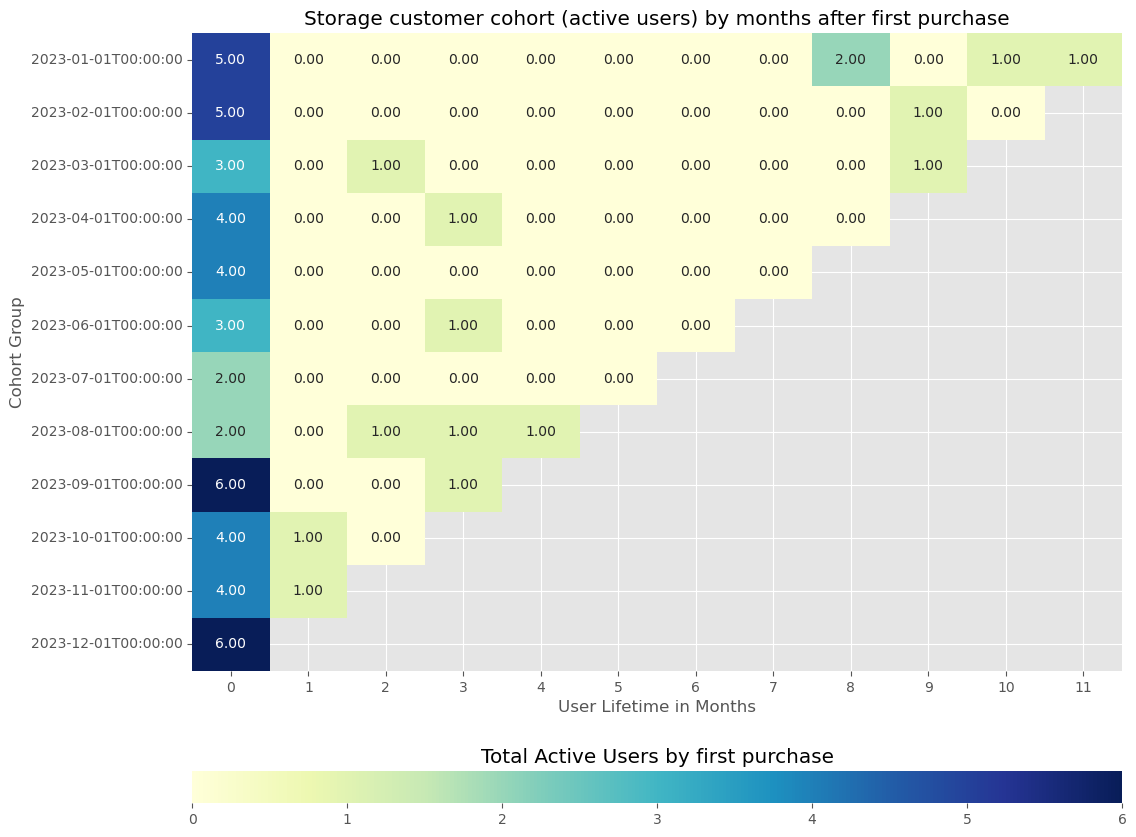

In [17]:
# customer cohort
pivot0 =prod14_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Storage customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- We can see generally for most cohorts, there no activity beyond the initial purchase.
- If there is returning active users, generally it is at the end of the year. We can see this for the January, February, March, and August cohort.

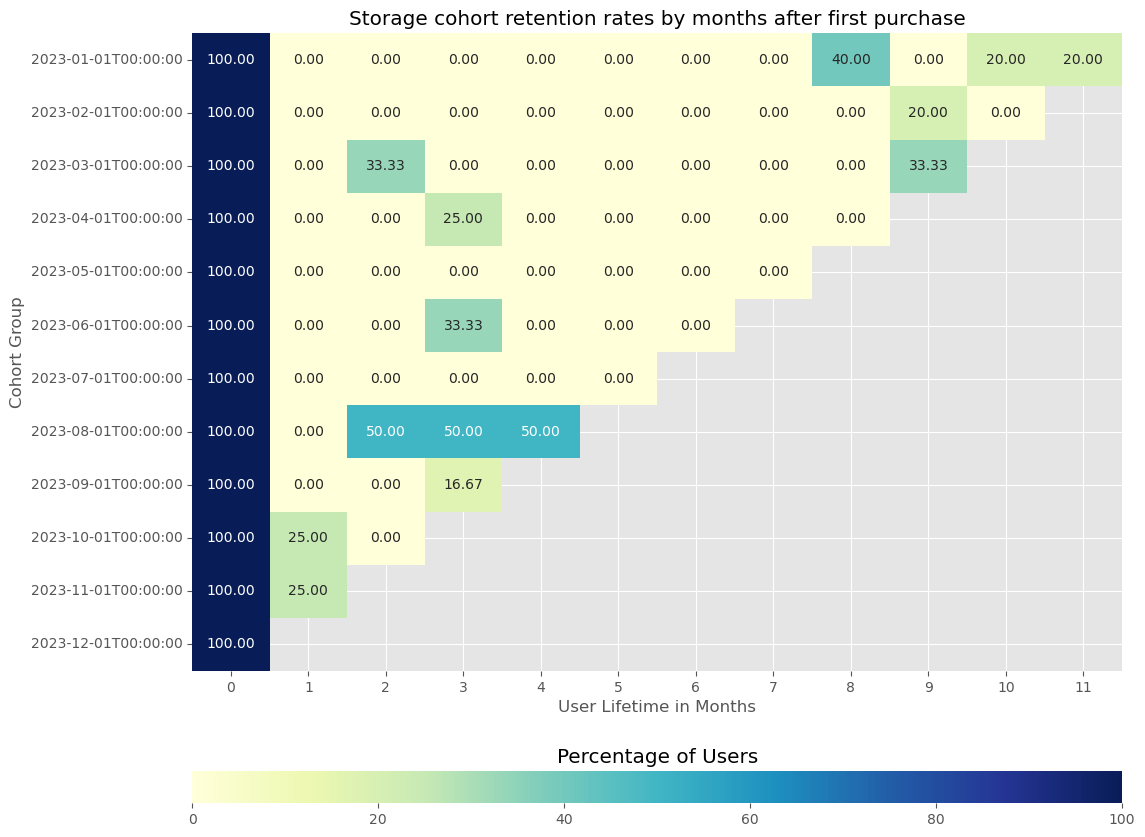

In [19]:
# customer retention
pivot1 =prod14_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Storage cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- Generally, as there is no activity beyond the initial purchase, retention rates for all cohorts is 0% . 
- Some users would make return purchases in the cohort's lifetime, but it is relatively rare.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

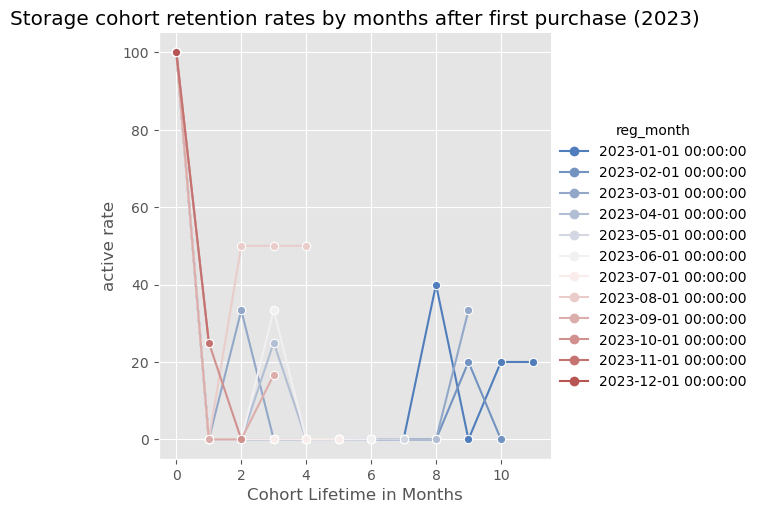

In [20]:
# retention rate lineplots
sns.relplot(data=prod14_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Storage cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [18]:
prod14_cohort2 =prod14_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

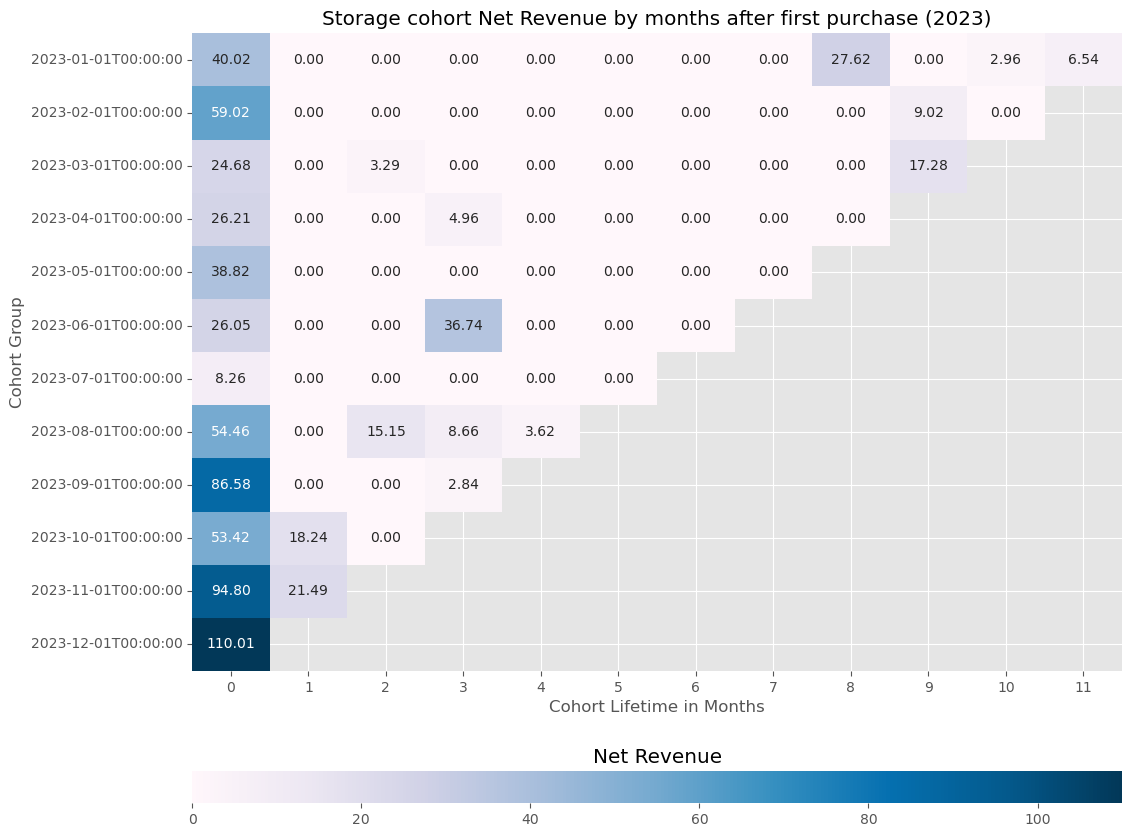

In [22]:
# Net Revenue by Cohort
pivot2 =prod14_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Storage cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- With no subsequent purchases, each cohort's net revenue value depends on the purchase in initial month.
- December cohort, who has 6 users in the initial month, has the highest initial purchase, at 110.10.

In [19]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod14_2023_user.loc[prod14_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod14_cohort2 = prod14_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod14_cohort2 ['net dollar retention'] = (prod14_cohort2['discounted_sales'] / prod14_cohort2['ds_max']) * 100

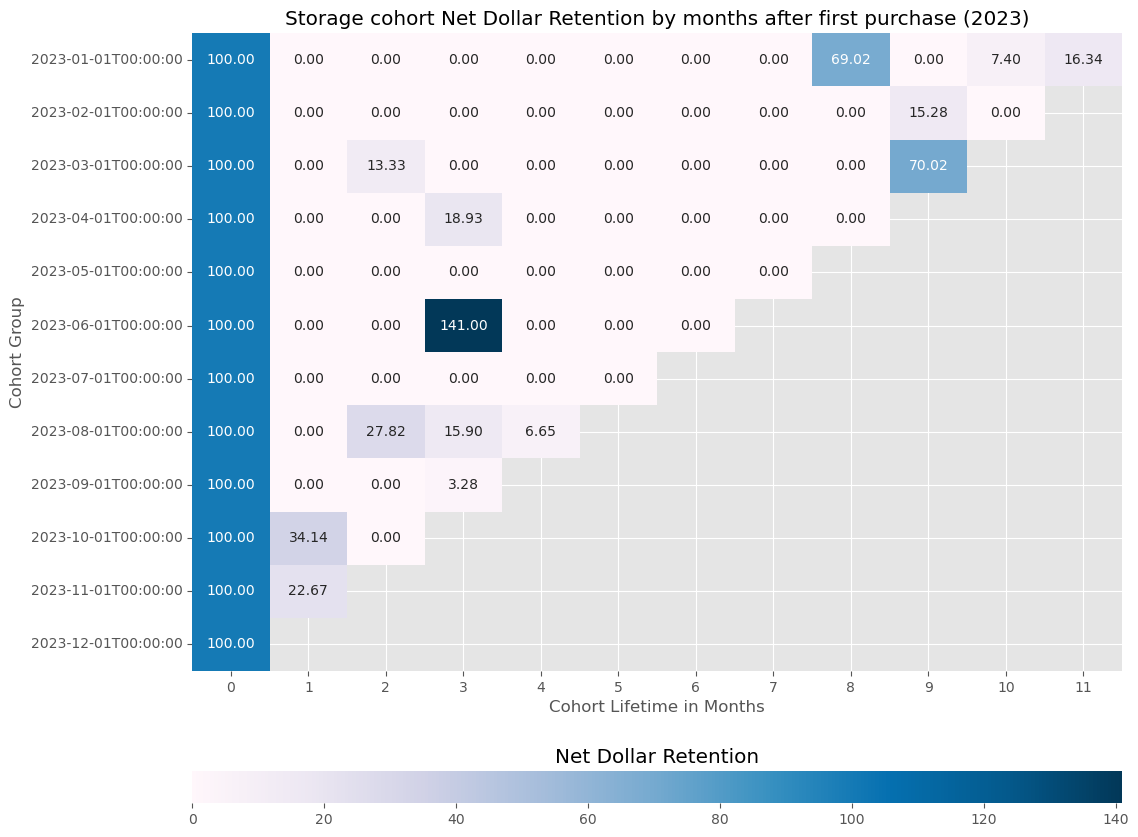

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod14_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Storage cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- After its initial month's purchase, generally there is no subsequent cohort purchases for Storage. June cohort made one purchase that is significant in terms of NDR (141%), but this value in reality is very little as its initial purchase is only 26.05.

In [20]:
prod14_cohort2 ['cumulative lifetime revenue'] = prod14_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

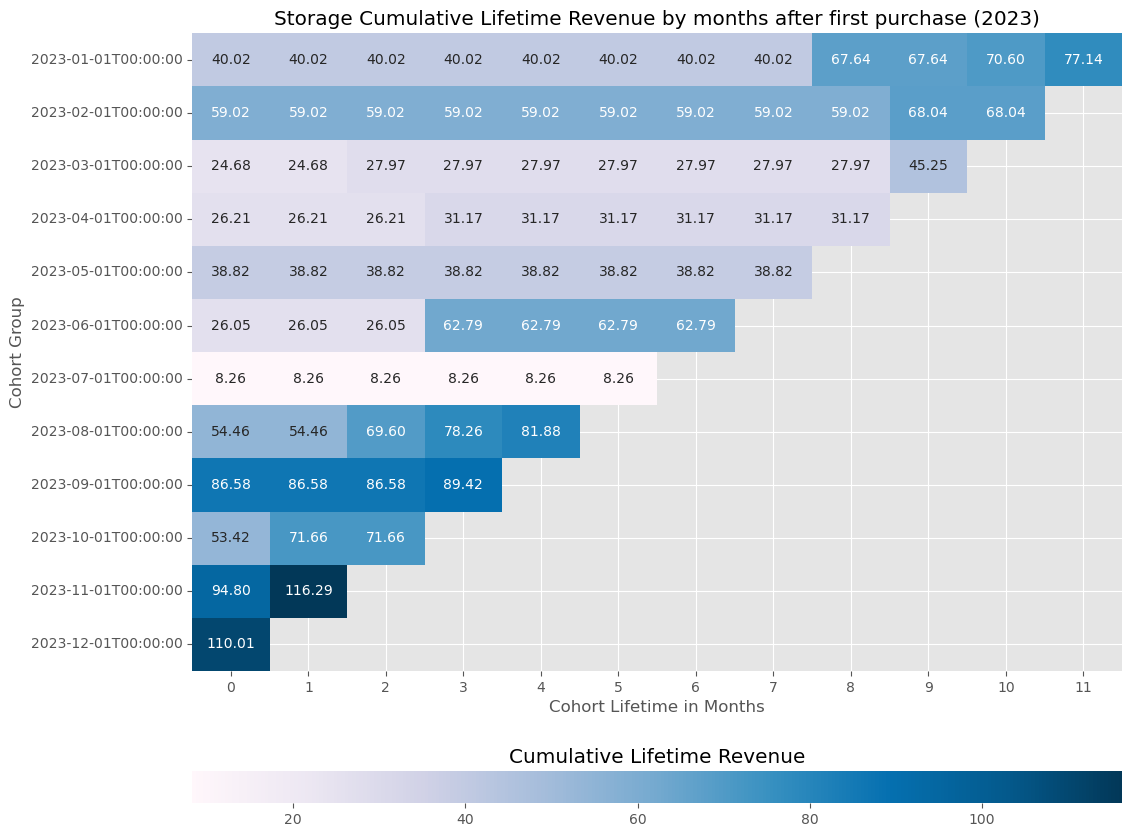

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod14_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Storage Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

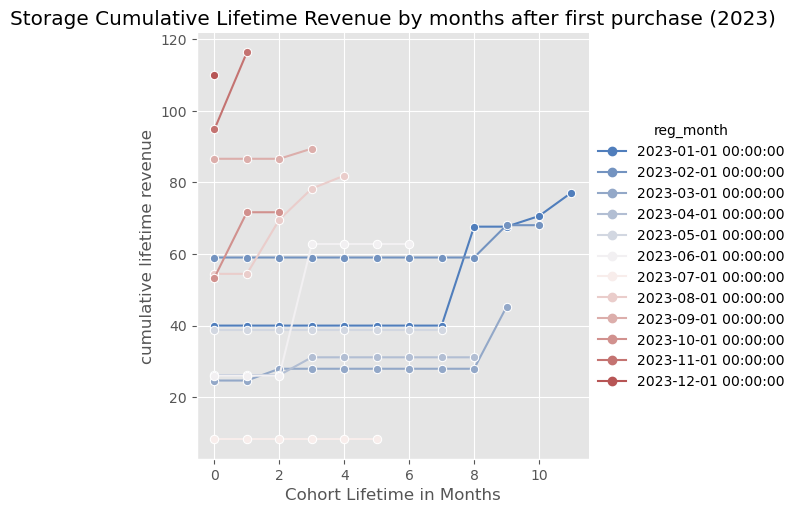

In [ ]:
# some data are easier to read with a different chart- cumulative lifetime revenue lineplots
sns.relplot(data=prod14_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Storage Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- For most cohorts there is little to no subsequent purchases, and its cumulative revenue remains relatively stagnant, its value being determined largely only the initial purchase.
- Some cohorts have a purchase in between stagnant months (usually in September) that makes it slightly more upwards trending than other cohorts. 

In [21]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod14_2023_user.loc[prod14_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod14_cohort2 = prod14_cohort2.merge(user_max,how='left',on=['reg_month'])
prod14_cohort2 ['customer lifetime revenue'] = (prod14_cohort2['cumulative lifetime revenue'] / prod14_cohort2['user_max'])

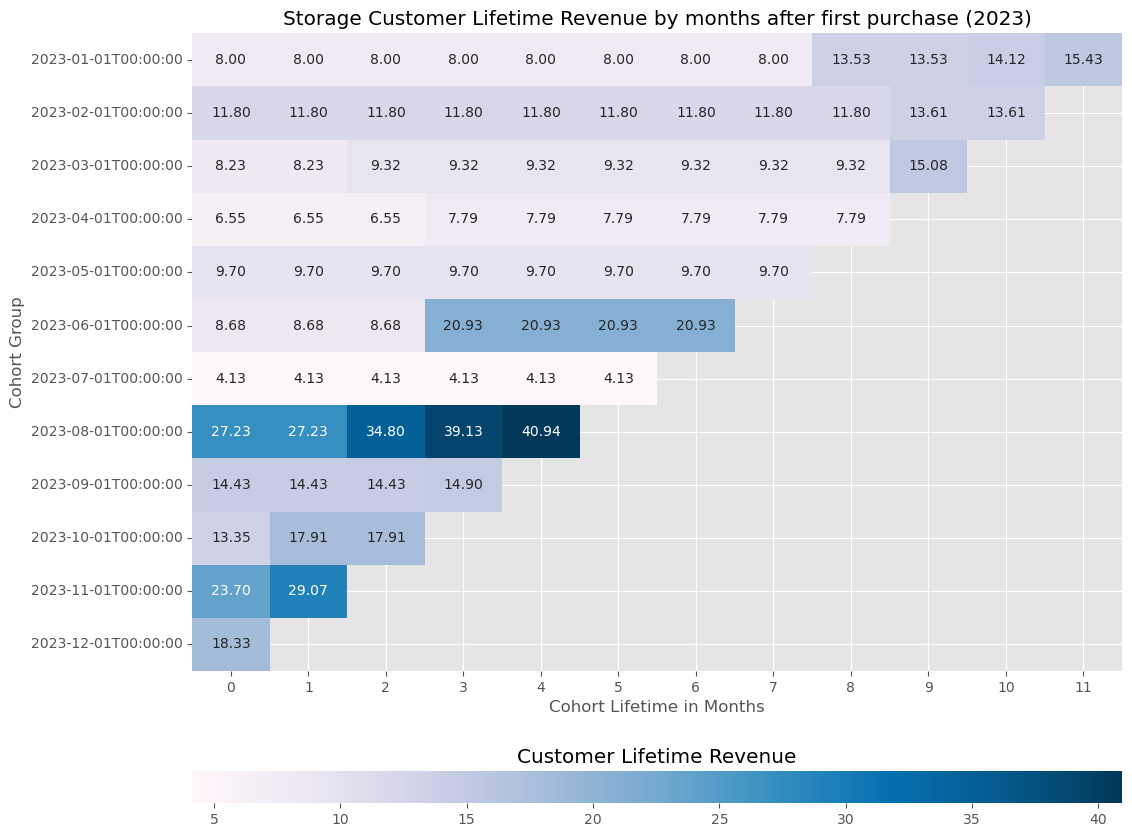

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod14_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Storage Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

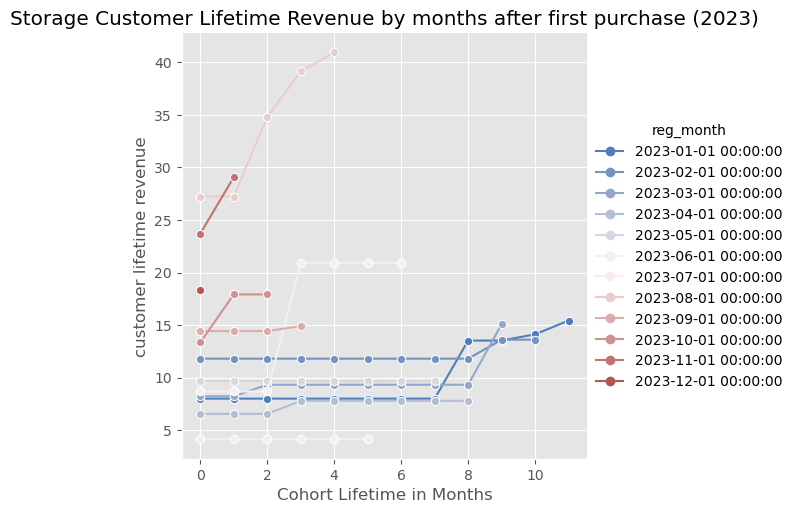

In [22]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod14_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Storage Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Generally there is no subsequent purchases across all cohorts, and per-user value throughout the year remains the same as its initial month. 
- On a per customer basis, the highest can be observed in the August cohort (40.94, by December), which have a more upwards-trending purchases than the other cohort. 

In [22]:
# CLV - but with net profit
prod14_cohort2 ['cum_net_profit'] = prod14_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod14_cohort2 ['Customer Lifetime Value'] = (prod14_cohort2['cum_net_profit'] / prod14_cohort2['user_max'])

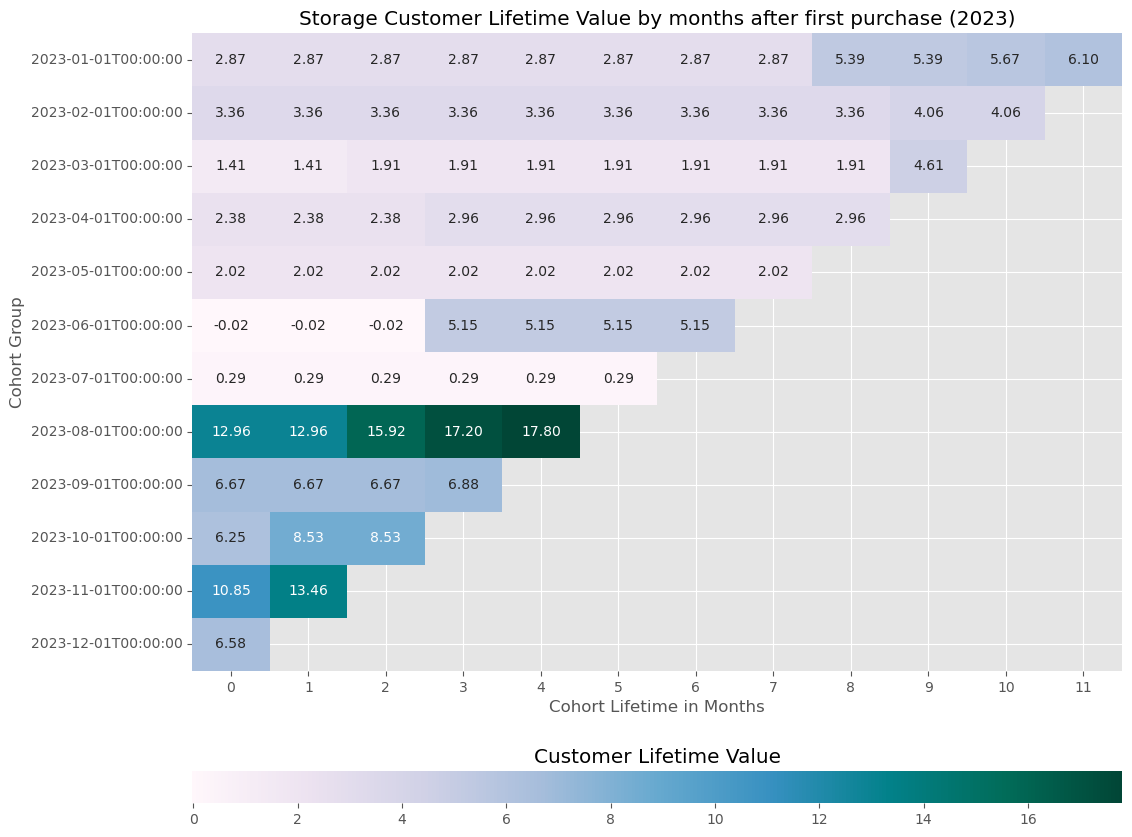

In [30]:
# Customer Lifetime Value, by cohort
pivot6 =prod14_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Storage Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

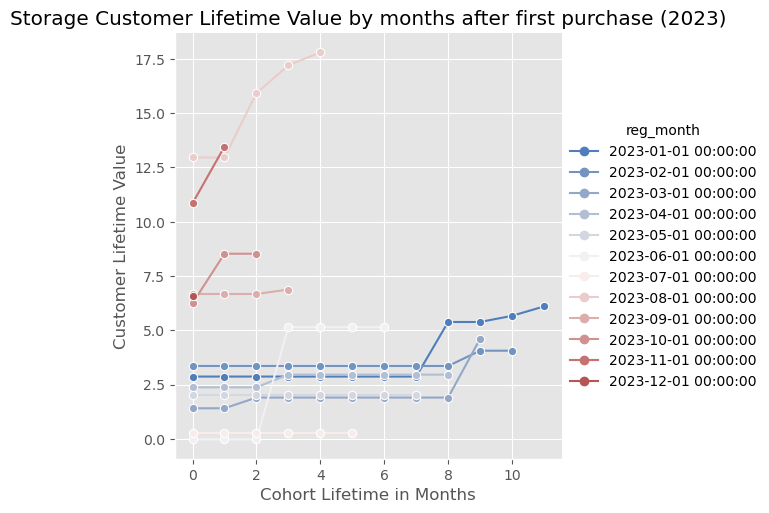

In [23]:
#  customer lifetime value lineplots
sns.relplot(data=prod14_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Storage Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Besides a few negative profit values per user in the June cohort (which is positive by September at 5.15), CLV for Storage is positive.
- August cohort is the only cohort to have an upwards trending CLV, and marks the highest profit from all the cohorts per user (17.80 by December). 

**Key findings:**
1. For most cohort, there no activity beyond the initial purchase (retention rates is 0%, NDR is 0%). Around Q4 (usually in September) there is some returning users for some cohorts.
2. December cohort (6 users) has the highest initial purchase, at 110.10.
3. On a per-customer basis, revenue is stagnant as many cohorts do not make subsequent purchases. August cohort contributes the highest revenue per user (40.94, by December) and have a more upwards-trending cumulative revenue than other cohorts. Profit-wise, August cohort is also the only cohort to have an upwards trending CLV, and marks the highest profit from all the cohorts per user (17.80 by December). 
4. Besides a few negative profit values per user in the June cohort (which is positive by September at 5.15), CLV for Storage is positive.


### Profitability

In [7]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod14_2023[prod14_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod14_2023[prod14_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

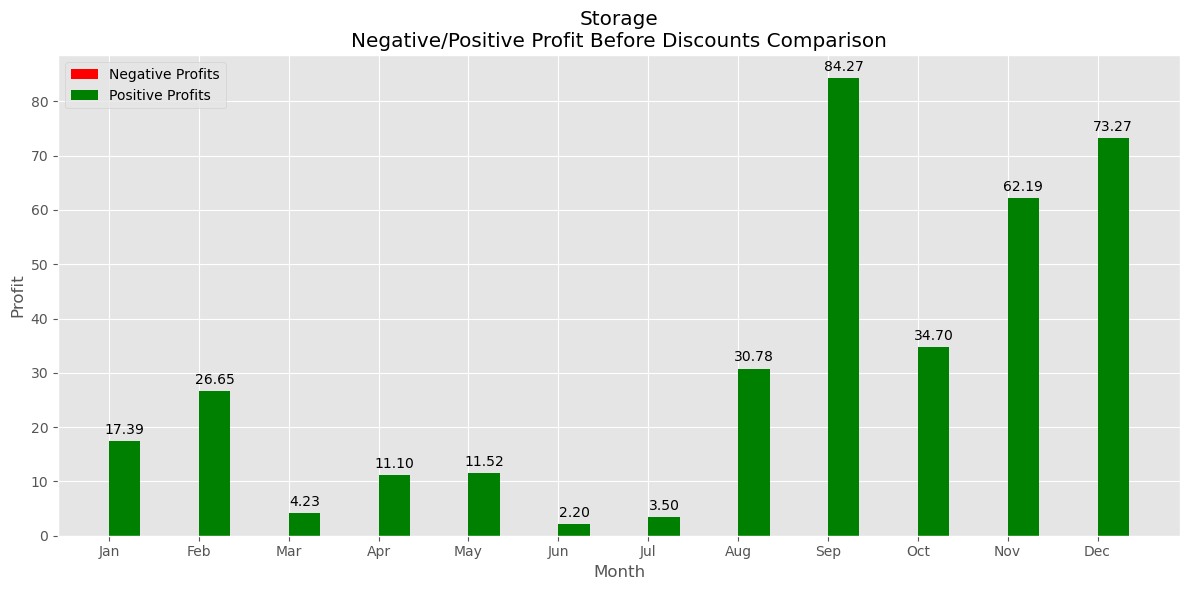

In [8]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Storage\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

**Key findings:**
1. Pre-discounts, the overall financial health of Storage looks strong with consistently positive profits, and no months showing negative profits.
2. Certain periods showed particularly high overall profits. Specifically, September had the highest overall profit with 84.2730, followed by December with 73.2729, and November with 62.1939. These months stand out due to their significantly higher profits compared to other months, likely driven by seasonal trends.
3. January to August shows relatively low positive profits, with the highest in August (30.7840) and the lowest in June (2.2014). This indicate lower consumer spending during the first half of the year.

### Discounting EDA

In [9]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod14_2023[(prod14_2023['net_profit'] < 0)]
post_discount_positives = prod14_2023[(prod14_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

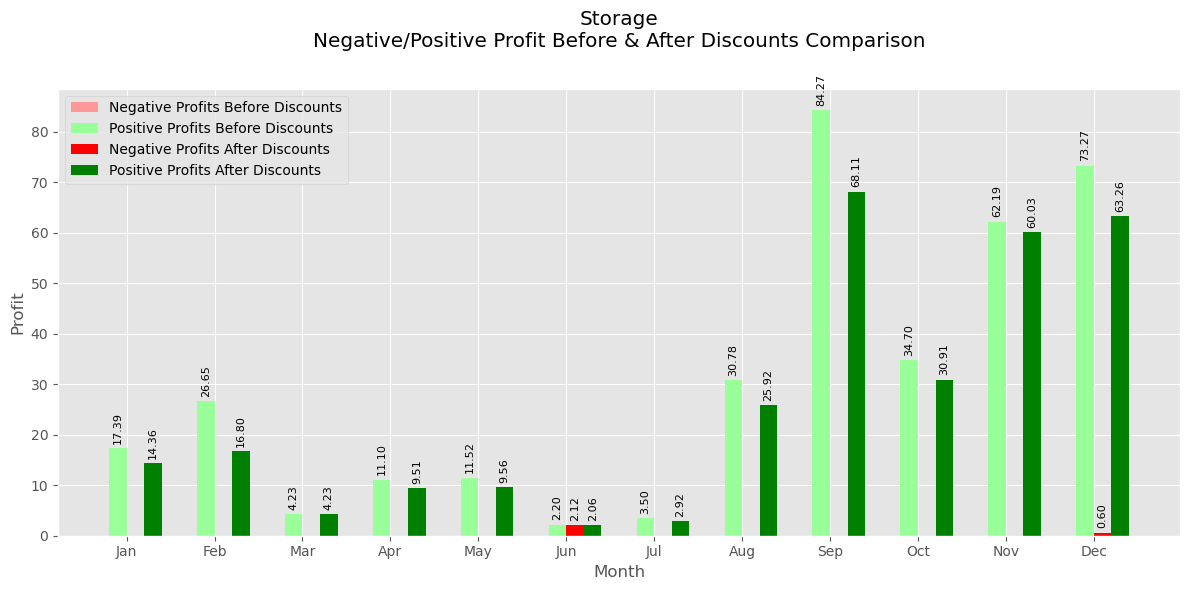

In [10]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Storage\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

- After discounts, overall financial health of Storage still looks strong with consistently positive profits. There is a slight reduction in positive profits overall, with slight increase of negative profits for certain months.
- September, November, and December remain the top three months in overall profit (68.1082, 60.0291, and 62.6569, respectively). However, September saw significant decrease in overall profit afer discounts, as positive profit dropped from 84.2730 to 68.1082, a reduction of approximately 19.20%.
- For Storage, overall impact of discounting on profits is minimal.

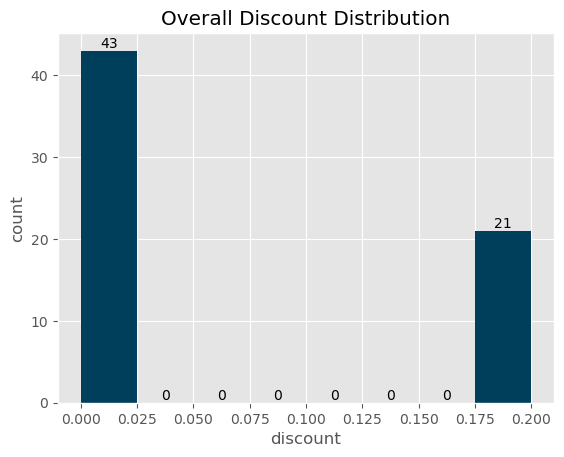

In [13]:
n, bins, patches = plt.hist(data=prod14_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- There were 64 invoices for Storage in 2023, 21 of which were applied discounts (~ 33%). Lower percentage of discounts suggests a controlled approach, possibly aimed at maintaining profit margins while still offering some incentives to attract or retain customers. However, we’ve seen that discounts do have a noticeable impact on overall profits, especially in high-profit months like September.
- 21 orders had a 20% discount, the only type offered for Storage. Uniform approach is effective, however there's always room for optimization.

In [16]:
# Range of Discounts (February, June, September, November)
filtered_df = prod14_2023[prod14_2023['month'].isin([2, 6, 9, 12])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std    mean     min  median     75%     max  count
month Discount                                                      
2     0.0000   0.0789  0.2802  0.2244  0.2802  0.3081  0.3360      2
      0.2000   2.0692  5.4126  3.0654  6.1992  6.5862  6.9732      3
6     0.0000   0.4576  1.0300  0.7065  1.0300  1.1918  1.3536      2
      0.2000      NaN -2.1195 -2.1195 -2.1195 -2.1195 -2.1195      1
9     0.0000   5.4603  8.1996  1.7876  6.9654  8.7710 16.8000      5
      0.2000   5.9454  6.7775  2.7222  4.4450  8.0745 15.4980      4
12    0.0000   5.2587  6.6664  1.1946  6.4216  8.8628 16.2099      7
      0.2000   5.4254  3.1985 -0.6048  1.2432  1.7487 12.7764      5

- A 0% discount yields slightly higher and stable profits. February’s mean profit is 0.2802 (median 0.3081). In June, it’s 1.0300 (median 1.1918). September’s mean profit is 8.1996 (median 8.7710). In December, it’s 6.6664 (median 8.8628).
- 20% discount reveals slightly greater variability in profitability, with the potential for significant losses (particularly evident in June and December). In June, mean profit drops drastically to -2.1195, due to a single order count (no variability). September shows lower mean profit of 6.7775 and a median of 4.4450, but with slightly higher variability (5.9454 compared to 5.4603). December demonstrates similar scenario, with a mean profit of 3.1985 and a median of 1.2432, and even the potential for losses as indicated by the minimum value of -0.6048.
- For Storage, 0% discounts yield stable profits, while 20% discounts tend to slightly increase variability and losses. A slight reduction in discounts might be possible.

**Key findings:**
1. There were 64 invoices for Storage in 2023, 21 of which were applied discounts (~ 33%). All discounted orders are applied 20% discount. This suggests a strategy to balance profit margins and customer incentives.
2. Discounting has had a minimal overall impact on Storage's profits. September, November, and December maintains highest overall profits even after discounts (68.1082, 60.0291, and 62.6569, respectively).
3. For Storage, 0% discounts yield slightly higher and stable profits, while 20% discounts increase variability and potential losses. A slight reduction in discounts might be possible.

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod14_2023_segment = prod14_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod14_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod14_2023_percents = segment_account.merge(prod14_2023_segment,how='left',on=['Segment'])
prod14_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,13,41,126.5000,120.4520,34.1763,28.1283
1,SMB,36,146,520.6880,495.9344,231.3811,206.6275
2,Strategic,15,62,210.4060,184.3468,96.2523,70.1931


In [8]:
# calculate percentage of segment's business share by category
prod14_2023_percents['% Account']= prod14_2023_percents['account'] / prod14_2023_percents['account'].sum() *100
prod14_2023_percents['% Quantity']= prod14_2023_percents['Quantity'] / prod14_2023_percents['Quantity'].sum() *100
prod14_2023_percents['% Sales']= prod14_2023_percents['Sales'] / prod14_2023_percents['Sales'].sum() *100
prod14_2023_percents['% Net Revenue']= prod14_2023_percents['discounted_sales'] / prod14_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod14_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod14_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

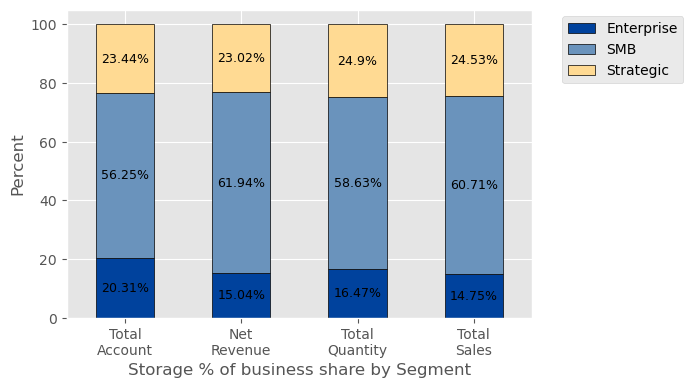

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod14_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Storage % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "Storage" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for Storage based on the last year of company activity.
- SMB segment holds the highest share in Total Accounts (56.25%), Net Revenue (61.94%), Total Quantity (58.63%), and Total Sales (60.72%), indicating a dominant presence for the Storage product.

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

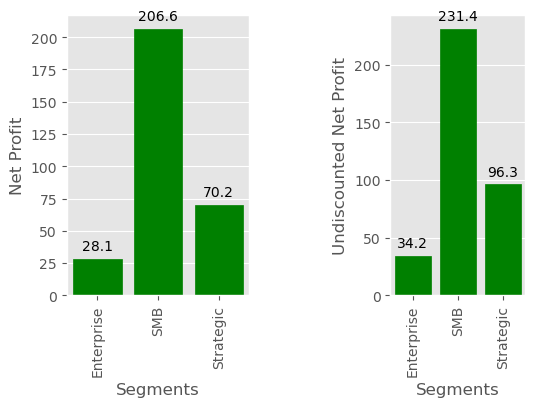

In [36]:
# Storage net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod14_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod14_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment leads the Storage product in Total Accounts (56.25%), Net Revenue (61.94%), Total Quantity (58.63%), and Total Sales (60.72%). It also shows the highest Net Profit Before Discount (231.3811) and a substantial positive Net Profit (206.6275), making it the top performer.
- Strategic segment maintains significant shares in Total Accounts (23.44%), Net Revenue (23.02%), Total Quantity (24.90%), and Total Sales (24.53%). It demonstrates strong financial performance with a Net Profit Before Discount (96.2523) and a positive Net Profit (70.1931).
- Enterprise segment, while having the lowest shares compared to the other segments, still maintains a consistent presence in Total Accounts (20.31%) and Net Revenue (15.04%). It achieves a positive Net Profit of 28.1283, demonstrating efficient cost management and profitability.

SMB segment is the key contributor to profitability for the Storage product, demonstrating strong contributions in both revenue and profitability. The Strategic segment also shows positive financial performance, while the Enterprise segment, although smaller in share, remains profitable and contributes positively to the overall success of the product.

### Further Inquiries on Segments -----------

In [12]:
# Copy-pasted code for Industry queries within segment
# Industries using Storage within the SMB Segment
prod14_2023_industry_SMB = prod14_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod14_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod14_2023_percents_SMB = SMB_account.merge(prod14_2023_industry_SMB,how='left',on=['Industry'])
prod14_2023_percents_SMB['% Account']= prod14_2023_percents_SMB['account'] / prod14_2023_percents_SMB['account'].sum() *100
prod14_2023_percents_SMB['% Quantity']= prod14_2023_percents_SMB['Quantity'] / prod14_2023_percents_SMB['Quantity'].sum() *100
prod14_2023_percents_SMB['% Sales']= prod14_2023_percents_SMB['Sales'] / prod14_2023_percents_SMB['Sales'].sum() *100
prod14_2023_percents_SMB['% Net Revenue']= prod14_2023_percents_SMB['discounted_sales'] / prod14_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod14_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod14_SMB = percents_SMB.columns.tolist()
# Industries using Storage within the Strategic Segment
prod14_2023_industry_Strategic = prod14_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod14_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod14_2023_percents_Strategic = Strategic_account.merge(prod14_2023_industry_Strategic,how='left',on=['Industry'])
prod14_2023_percents_Strategic['% Account']= prod14_2023_percents_Strategic['account'] / prod14_2023_percents_Strategic['account'].sum() *100
prod14_2023_percents_Strategic['% Quantity']= prod14_2023_percents_Strategic['Quantity'] / prod14_2023_percents_Strategic['Quantity'].sum() *100
prod14_2023_percents_Strategic['% Sales']= prod14_2023_percents_Strategic['Sales'] / prod14_2023_percents_Strategic['Sales'].sum() *100
prod14_2023_percents_Strategic['% Net Revenue']= prod14_2023_percents_Strategic['discounted_sales'] / prod14_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod14_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod14_Strategic = percents_Strategic.columns.tolist()
# Industries using Storage within the Enterprise Segment
prod14_2023_industry_Enterprise = prod14_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod14_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod14_2023_percents_Enterprise = Enterprise_account.merge(prod14_2023_industry_Enterprise,how='left',on=['Industry'])
prod14_2023_percents_Enterprise['% Account']= prod14_2023_percents_Enterprise['account'] / prod14_2023_percents_Enterprise['account'].sum() *100
prod14_2023_percents_Enterprise['% Quantity']= prod14_2023_percents_Enterprise['Quantity'] / prod14_2023_percents_Enterprise['Quantity'].sum() *100
prod14_2023_percents_Enterprise['% Sales']= prod14_2023_percents_Enterprise['Sales'] / prod14_2023_percents_Enterprise['Sales'].sum() *100
prod14_2023_percents_Enterprise['% Net Revenue']= prod14_2023_percents_Enterprise['discounted_sales'] / prod14_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod14_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod14_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

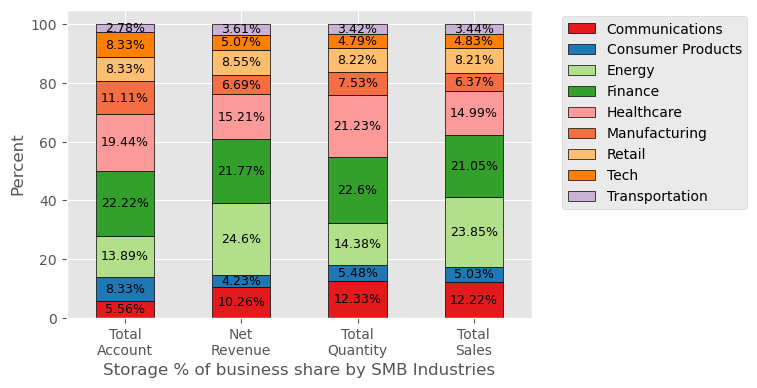

In [38]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod14_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Storage % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (22.22%), Net Revenue (21.77%), and Total Quantity (22.60%).
- Energy industry shows strong performance with the highest share in Net Revenue (24.60%) and Total Sales (23.85%).
- Healthcare industry contributes significantly across categories, maintaining high shares in Total Accounts (19.44%) and Total Quantity (21.23%).
- Communications industry maintains consistent shares across categories, contributing notably to Net Revenue (10.26%) and Total Sales (12.22%).
- Consumer Products, Retail, and Tech industries show moderate shares across categories, maintaining a presence in the SMB segment.
- Manufacturing industry has moderate shares in Total Accounts (11.11%) and Net Revenue (6.69%).
- Transportation industry, despite lower shares, contributes to Total Sales (3.44%).

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

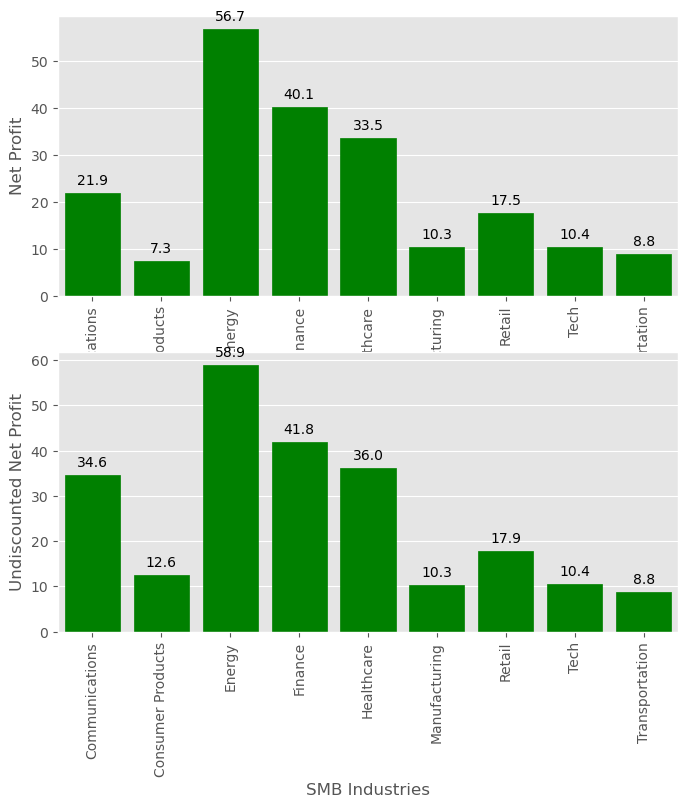

In [39]:
# Storage net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod14_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod14_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the SMB segment in Total Accounts (22.22%), Total Quantity (22.60%), Net Revenue (21.77%), and Total Sales (21.05%). It also shows a high Net Profit Before Discount (41.7937) and a substantial positive Net Profit (40.1185).
- Energy industry shows strong performance with the highest share in Net Revenue (24.60%) and Total Sales (23.85%), achieving a significant positive Net Profit of 56.7471.
- Healthcare industry contributes significantly across categories, maintaining high shares in Total Accounts (19.44%) and Total Quantity (21.23%). It achieves a positive Net Profit of 33.4702.
- Communications and Retail industries maintain consistent shares across categories, contributing notably to Net Revenue and Total Sales, with positive net profits of 21.8964 and 17.5344, respectively.
- Consumer Products, Manufacturing, and Tech industries show moderate shares across categories, maintaining a presence in the SMB segment, with positive net profits.
- Transportation industry, despite lower shares, achieves a positive Net Profit of 8.7710.

Finance, Energy, Healthcare, Communications, and Retail industries are key contributors to profitability within the SMB segment of the Storage product, demonstrating strong contributions in both revenue and profitability. The Consumer Products, Manufacturing, Tech, and Transportation industries also show positive financial performance.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

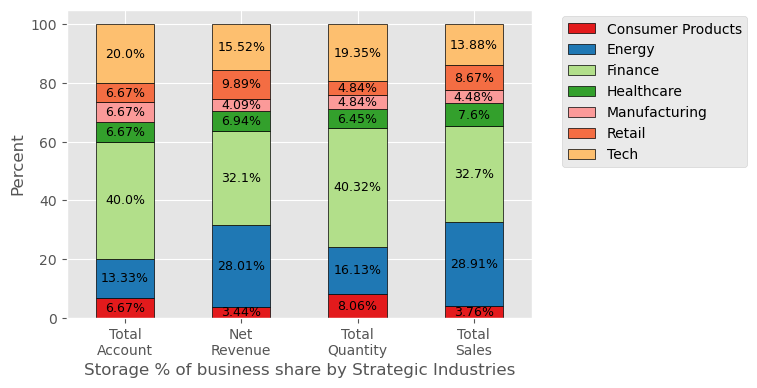

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod14_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Storage % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (40.00%), Net Revenue (32.10%), Total Quantity (40.32%), and Total Sales (32.70%), indicating a dominant presence in the Strategic segment.
- Energy industry holds significant shares in Net Revenue (28.01%) and Total Sales (28.91%), contributing notably across categories.
- Tech industry maintains consistent shares in Total Accounts (20.00%) and Net Revenue (15.52%).
- Retail and Consumer Products industries show moderate shares across categories, contributing to Net Revenue and Total Sales.
- Healthcare industry, despite lower shares, maintains a presence in the segment.
- Manufacturing industry shows the lowest shares across categories but still contributes to Total Quantity and Total Sales.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Consumer Products'),
  Text(1, 0, 'Energy'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Retail'),
  Text(6, 0, 'Tech')])

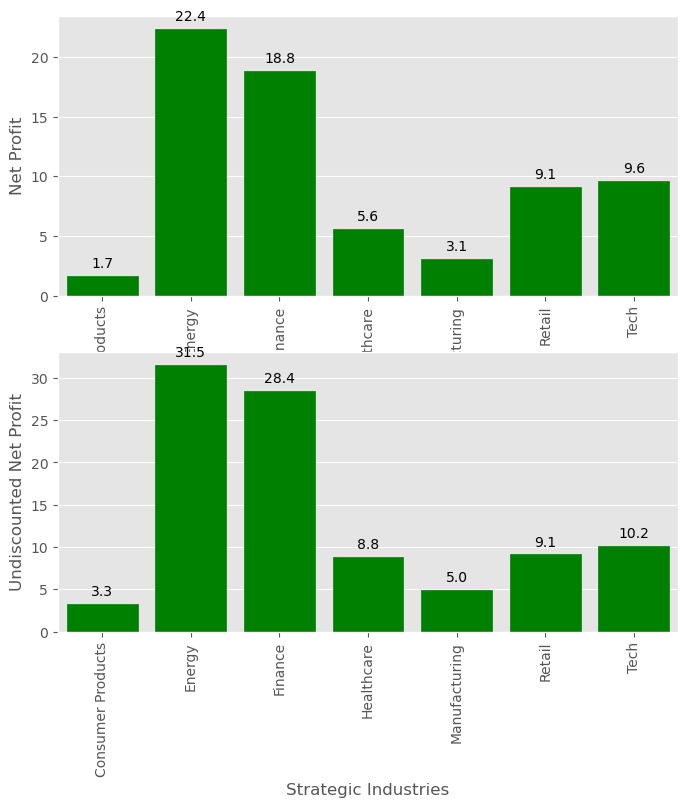

In [41]:
# Storage net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod14_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod14_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the Strategic segment in Total Accounts (40.00%), Net Revenue (32.10%), Total Quantity (40.32%), and Total Sales (32.70%). It also shows a high Net Profit Before Discount (28.4207) and a substantial positive Net Profit (18.7951).
- Energy industry holds significant shares in Net Revenue (28.01%) and Total Sales (28.91%), achieving a significant positive Net Profit of 22.3520.
- Tech industry maintains consistent shares in Total Accounts (20.00%) and Net Revenue (15.52%), achieving a positive Net Profit of 9.5776.
- Retail and Consumer Products industries, despite lower shares, maintain a positive Net Profit of 9.1200 and 1.6830, respectively.
- Healthcare and Manufacturing industries, while having lower shares, also achieve positive net profits of 5.6000 and 3.0654, respectively.

Finance, Energy, and Tech industries are key contributors to profitability within the Strategic segment of the Storage product, demonstrating strong contributions in both revenue and profitability. The Retail, Consumer Products, Healthcare, and Manufacturing industries also show positive financial performance, maintaining a presence in the segment.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

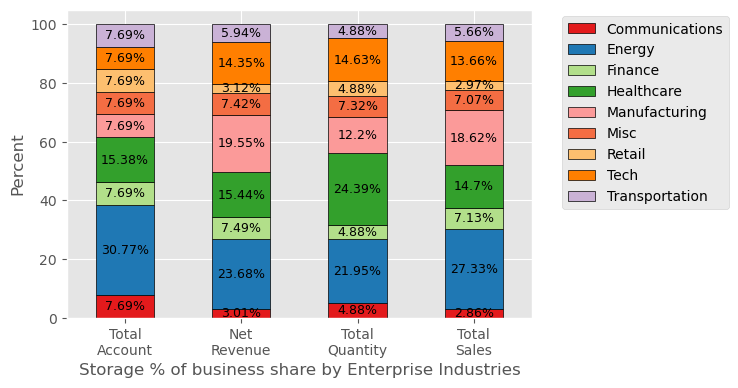

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod14_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Storage % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Energy industry leads in Total Accounts (30.77%), Net Revenue (23.68%), and Total Sales (27.33%), indicating a dominant presence in the Enterprise segment.
- Healthcare industry holds significant shares in Total Quantity (24.39%) and Total Sales (14.70%), contributing notably across categories.
- Manufacturing industry maintains a consistent presence with substantial shares in Net Revenue (19.55%) and Total Sales (18.62%).
- Tech industry shows notable contributions across categories, with shares in Net Revenue (14.35%) and Total Sales (13.66%).
- Misc industry, despite lower shares, maintains a presence in the segment.
- Communications, Finance, Retail, and Transportation industries have lower shares across categories but still contribute to the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Energy'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

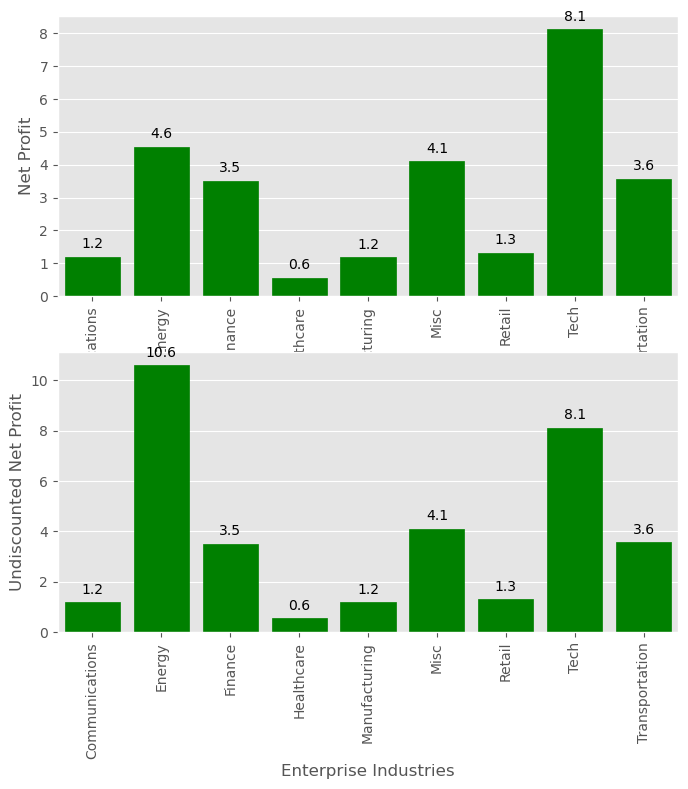

In [43]:
# Storage net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod14_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod14_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Energy industry leads the Enterprise segment in Total Accounts (30.77%), Net Revenue (23.68%), and Total Sales (27.33%). It also shows a high Net Profit Before Discount (10.5984) and a positive Net Profit (4.5504).
- Healthcare industry holds significant shares in Total Quantity (24.39%) and Total Sales (14.70%), contributing notably to Net Revenue and maintaining a positive Net Profit (0.5580).
- Manufacturing industry maintains a consistent presence with substantial shares in Net Revenue (19.55%) and Total Sales (18.62%), achieving a positive Net Profit (1.1775).
- Tech industry shows notable contributions across categories, with shares in Net Revenue (14.35%) and Total Sales (13.66%), achieving a significant positive Net Profit (8.1216).
- Misc industry, despite lower shares, maintains a presence and achieves a positive Net Profit (4.1124).
- Communications, Finance, Retail, and Transportation industries have lower shares across categories but still contribute positively to the segment.

Energy, Healthcare, Manufacturing, and Tech industries are key contributors to profitability within the Enterprise segment of the Storage product, demonstrating strong contributions in both revenue and profitability. The Misc, Communications, Finance, Retail, and Transportation industries also show positive financial performance, maintaining a presence in the segment.

**Key findings:**
1. Prioritize the SMB segment, which leads in Total Accounts (56.25%), Net Revenue (61.94%), Total Quantity (58.63%), and Total Sales (60.72%), with the highest Net Profit Before Discount (231.38) and Net Profit (206.63). Maintain the performance of both the Strategic segment, with significant shares in Total Accounts (23.44%), Net Revenue (23.02%), Total Quantity (24.90%), and Total Sales (24.53%), and a Net Profit Before Discount of 96.25 and Net Profit of 70.19, and the Enterprise segment, which shows efficient cost management and profitability with a Net Profit Before Discount of 28.13 and Net Profit of 28.13.
2. For the SMB segment, prioritize the Energy industry and consider the Finance and Healthcare industries.
3. For the Strategic segment, focus primarily on the Energy industry, with the Finance industry as a secondary consideration.
4. For the Enterprise segment, focus primarily on Tech industries, keeping Energy industries as secondary consideration.

### Regional EDA

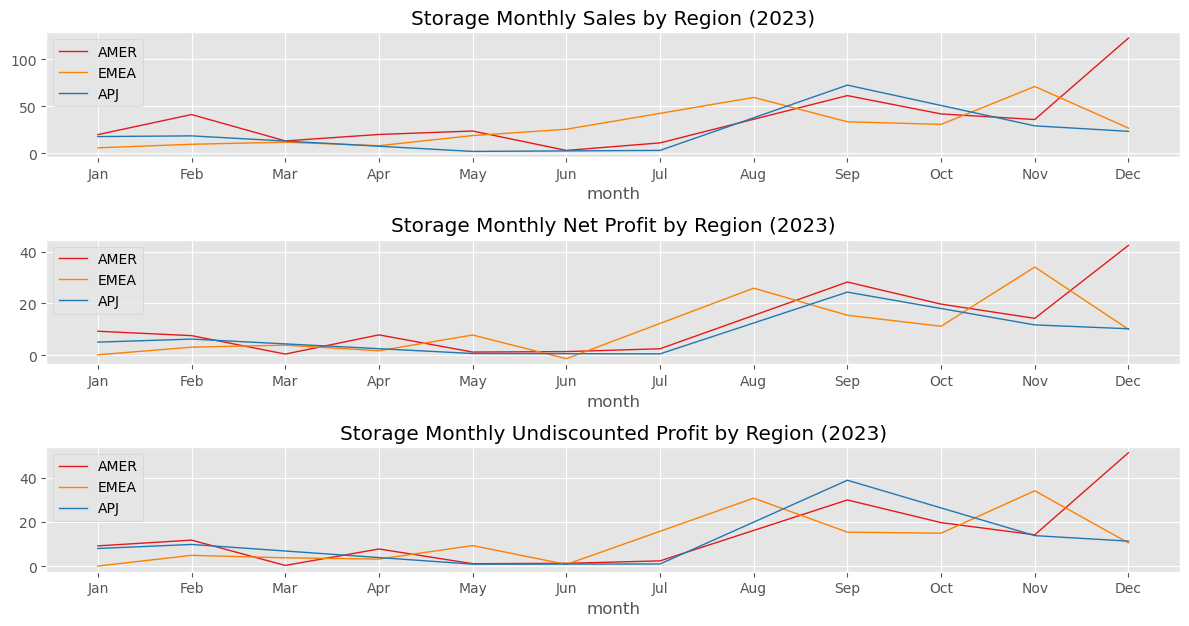

In [10]:
# Storage Monthly Income EDA by Region (2023)
prod14_region_month = prod14_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod14_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod14_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod14_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Storage Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod14_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod14_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod14_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Storage Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod14_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod14_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod14_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Storage Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

AMER occasionally led in sales and net profits, showing periodic peaks and fluctuating performance. EMEA excelled in the middle and later parts of the year. APJ only led in sales in September and had variable performance, with discounts often significantly affecting profitability.
- AMER experienced significant sales and net profit peaks, particularly in September and December. However, performance fluctuated throughout the year, with some months showing lower sales and profits. Discounts had a substantial impact on net profits, often reducing overall profitability.
- EMEA consistently excelled in sales and net profits, especially in the middle and later parts of the year, despite the impact of discounts. The region maintained positive net profits throughout the year except for June, and exhibited significant peaks in May, August, and November.
- APJ's sales and net profits is consistently low, with notable peak in September. Discounts frequently reduced or negated profits, impacting overall profitability.

Performance Highlights
- Highest Sales: In AMER, December shows the highest sales of 122.5660.
- Highest Net Profit: The highest net profit is seen in AMER, December, with a net profit of 42.4972.
- Highest Undiscounted Profit: AMER in December also shows the highest undiscounted profit at 51.3244.

In [11]:
prod14_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,9,19.7300,19.7300,9.2337,9.2337
1,AMER,2,17,41.0760,36.7848,11.8248,7.5336
2,AMER,3,7,13.0200,13.0200,0.3906,0.3906
3,AMER,4,8,19.8700,19.8700,7.8286,7.8286
4,AMER,5,5,23.5500,23.5500,1.1775,1.1775
5,AMER,6,1,2.8800,2.8800,1.3536,1.3536
6,AMER,7,7,10.9000,10.9000,2.4500,2.4500
7,AMER,9,15,61.2760,59.6008,29.9684,28.2932
8,AMER,10,13,41.7400,41.7400,19.7374,19.7374
9,AMER,11,10,35.8000,35.8000,14.2260,14.2260


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

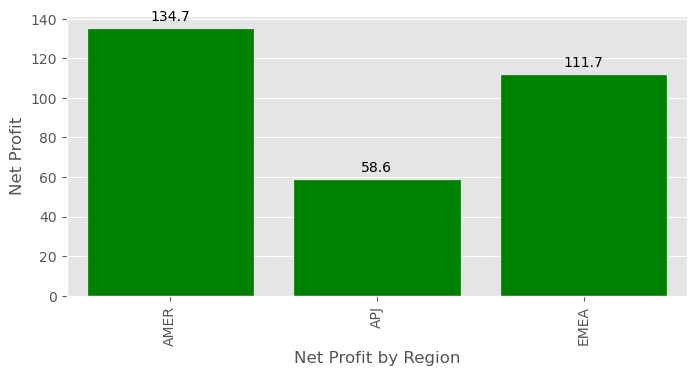

In [12]:
prod14_region = prod14_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod14_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [13]:
prod14_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,125,392.4080,377.6144,149.5150,134.7214
1,APJ,43,165.4400,139.9600,84.0525,58.5725
2,EMEA,81,299.7460,283.1588,128.2422,111.6550


High-Performing Region
- AMER outperforms the other regions in both sales and net profits, both before and after discounts. EMEA performs well but is consistently second to AMER, while APJ has the lowest figures across all metrics. Discounts have a noticeable impact on profits for all regions but do not change the overall ranking.
- Each region has high-performing aspects. AMER shows strong performance but needs better discount management and stability. EMEA is strong overall but can improve early-year performance. APJ has the most potential for growth, needing strategies to boost sales and manage discounts more effectively.

In [7]:
grouped = prod14_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [8]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

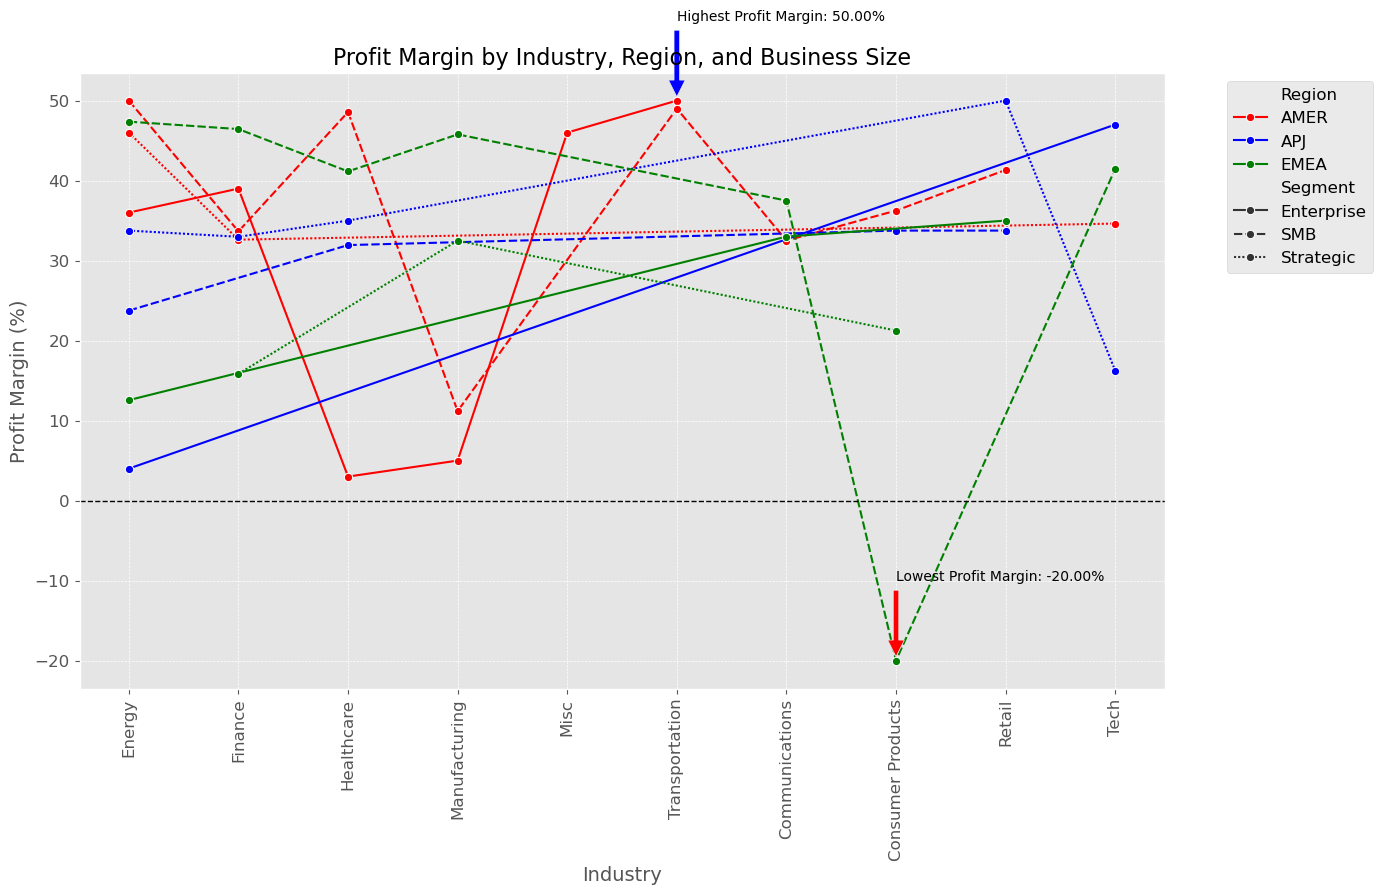

In [9]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [10]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

#### Cross-segment SMB

In [11]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

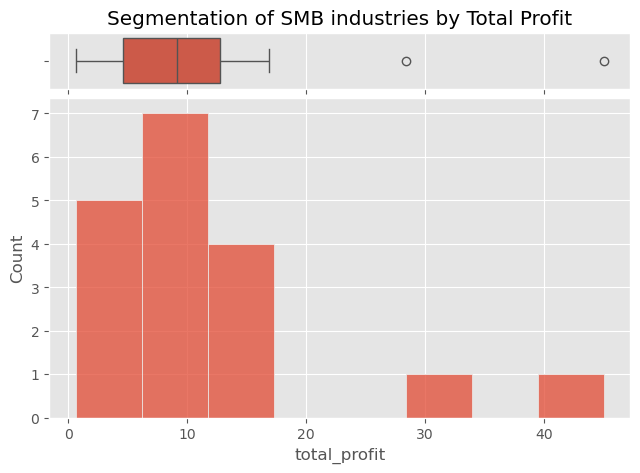

0.0000    0.6156
0.2500    4.6389
0.5000    9.1200
0.7500   12.7431
1.0000   45.0564
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 12.74 in profit
- 3 (Good) : Contributes between 9.12 and 12.74 in profit
- 2 (Marginal) : Contributes between 4.64 and 9.12 in profit
- 1 (Underperforming) : Contributes less than 4.64 in profit


In [12]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")

In [13]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
33,EMEA,SMB,Energy,45.0564,0.0000,4
9,AMER,SMB,Finance,28.4108,0.0400,4
12,AMER,SMB,Retail,16.9188,0.0000,4
10,AMER,SMB,Healthcare,16.7080,0.0000,4
6,AMER,SMB,Communications,12.7764,0.2000,4
35,EMEA,SMB,Healthcare,12.6434,0.0000,3
34,EMEA,SMB,Finance,11.7077,0.0000,3
37,EMEA,SMB,Tech,10.4301,0.0000,3
31,EMEA,SMB,Communications,9.1200,0.2000,2
8,AMER,SMB,Energy,9.1200,0.0000,2


In [14]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Energy in EMEA, Finance in AMER, Retail in AMER, Healthcare in AMER, Communications in AMER are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Healthcare in EMEA, Finance in EMEA, Tech in EMEA all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Communications in EMEA, Energy in AMER, Transportation in AMER, Manufacturing in EMEA, Consumer Products in APJ, Healthcare in APJ, Energy in APJ, Consumer Products in AMER, Manufacturing in AMER, Retail in APJ are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement a

#### Cross-segment Strategic

In [17]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

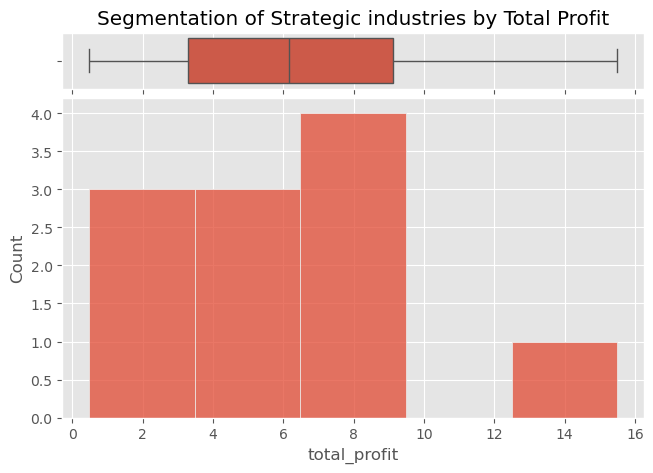

0.0000    0.4706
0.2500    3.2859
0.5000    6.1572
0.7500    9.1135
1.0000   15.4980
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 9.11 in profit
- 3 (Good) : Contributes between 6.16 and 9.11 in profit
- 2 (Marginal) : Contributes between 3.29 and 6.16 in profit
- 1 (Underperforming) : Contributes less than 3.29 in profit


In [18]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [19]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
23,APJ,Strategic,Energy,15.4980,0.2000,4
15,AMER,Strategic,Finance,9.1314,0.1000,4
26,APJ,Strategic,Retail,9.1200,0.0000,4
16,AMER,Strategic,Tech,9.1070,0.0000,3
14,AMER,Strategic,Energy,6.8540,0.0000,3
24,APJ,Strategic,Finance,6.1572,0.2000,2
25,APJ,Strategic,Healthcare,5.6000,0.2000,2
39,EMEA,Strategic,Finance,3.5065,0.1000,2
40,EMEA,Strategic,Manufacturing,3.0654,0.2000,1
38,EMEA,Strategic,Consumer Products,1.6830,0.2000,1


In [20]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Energy in APJ, Finance in AMER, Retail in APJ are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Tech in AMER, Energy in AMER all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Finance in APJ, Healthcare in APJ, Finance in EMEA, Manufacturing in EMEA, Consumer Products in EMEA, Tech in APJ are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



#### Cross-segment Enterprise

In [23]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

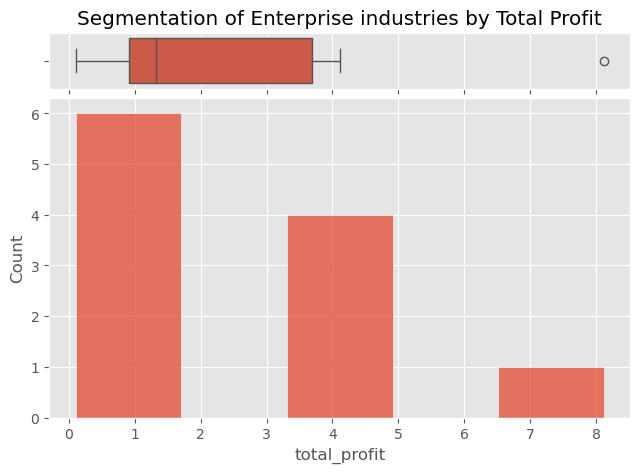

0.0000   0.1008
0.2500   0.9145
0.5000   1.3160
0.7500   3.6890
1.0000   8.1216
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 3.69 in profit
- 3 (Good) : Contributes between 1.32 and 3.69 in profit
- 2 (Marginal) : Contributes between 0.91 and 1.32 in profit
- 1 (Underperforming) : Contributes less than 0.91 in profit


In [24]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [25]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
18,APJ,Enterprise,Tech,8.1216,0.0000,4
4,AMER,Enterprise,Misc,4.1124,0.0000,4
29,EMEA,Enterprise,Energy,3.7980,0.2000,4
5,AMER,Enterprise,Transportation,3.5800,0.0000,3
1,AMER,Enterprise,Finance,3.5178,0.0000,3
30,EMEA,Enterprise,Retail,1.3160,0.0000,2
28,EMEA,Enterprise,Communications,1.1946,0.0000,2
3,AMER,Enterprise,Manufacturing,1.1775,0.0000,2
0,AMER,Enterprise,Energy,0.6516,0.0000,1
2,AMER,Enterprise,Healthcare,0.5580,0.0000,1


Total profits in the Enterprise segment are too similar and not high enough to justify distinct performance categories. However, we can use the data above along with previous analysis of the Enterprise segment (Segmentation EDA), and suggest Tech industries in APJ and Energy industries in EMEA.

**Key findings:**
1. Each region has high-performing aspects. AMER experienced significant sales and net profit peaks, particularly in September and December. However, performance fluctuated throughout the year, with some months showing lower sales and profits. 
2. EMEA consistently excelled in sales and net profits, especially in the middle and later parts of the year, despite the impact of discounts. The region maintained positive net profits throughout the year except for June, and exhibited significant peaks in May, August, and November.
3. APJ's sales and net profits is consistently lower than EMEA and AMER, with the exception of a notable peak in September. 
4. In the SMB segment, top-performing industries include Energy in EMEA, and Finance, Retail, Healthcare, and Communications in AMER. These sectors are crucial for customer engagement and product improvement. Prioritizing these industries for marketing investments and discount allocations can effectively drive growth.
5. For the Strategic segment, Energy in APJ, Finance in AMER, and Retail in APJ are top-performing industries. In the Enterprise segment, Tech industries in APJ and Energy industries in EMEA stand out, all being crucial for strategic growth.